In [1]:
# !pip3 install pandas numpy seaborn matplotlib sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set visual style for seaborn
sns.set(style="whitegrid")

### Load dataset

In [2]:
# Load the dataset
loan_df = pd.read_csv('loan_approval_data.csv')

### Dealing with categorical data

In [3]:
# Manually mapping categories to numerical values
education_mapping = {'8th': 0, '10th': 1, '12th': 2, 'Graduate': 3}
self_employed_mapping = {'Yes': 1, 'No': 0}
employment_type_mapping = {'Salaried': 1, 'Business': 2, 'Freelancer': 3}
loan_status_mapping = {'Approved': 1, 'Rejected': 0}

# Applying the mapping to the DataFrame
loan_df['education_encoded'] = loan_df['education'].map(education_mapping)
loan_df['self_employed_encoded'] = loan_df['self_employed'].map(self_employed_mapping)
loan_df['employment_type_encoded'] = loan_df['employment_type'].map(employment_type_mapping)
loan_df['loan_status_encoded'] = loan_df['loan_status'].map(loan_status_mapping)

# Optionally, drop the original columns if they are no longer needed
loan_df = loan_df.drop(['loan_id', 'education', 'self_employed', 'employment_type', 'loan_status'], axis=1)


# Split the data into training and testing sets
# test_size is the proportion of the dataset to include in the test split (e.g., 0.2 represents 20% of the dataset)
# random_state is a seed used by the random number generator for reproducibility
train, test = train_test_split(loan_df, test_size=0.2, random_state=42)

# Display the first few rows of the dataframe
train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_encoded,self_employed_encoded,employment_type_encoded,loan_status_encoded
1675,5,7900000,29900000,6,568,5800000,13900000,15900000,8700000,2,0,1,1
1164,0,9600000,34000000,12,710,23800000,10300000,38100000,7800000,3,1,3,1
192,1,800000,2900000,8,682,2200000,1100000,2900000,700000,3,0,1,1
910,2,4900000,13100000,18,754,8200000,3300000,16500000,7200000,0,0,1,1
567,5,3000000,11100000,12,441,8500000,2500000,7300000,2000000,0,0,1,0


#### Normalizing numerical columns

In [4]:
# Specify the columns you DO NOT want to scale
columns_not_to_scale = ['education_encoded', 'self_employed_encoded', 'employment_type_encoded', 'loan_status_encoded']

# Dynamically determine the columns to scale
columns_to_scale = [col for col in train.columns if col not in columns_not_to_scale]

# Initialize the ColumnTransformer to apply MinMaxScaler to the other columns
ct = ColumnTransformer([
    ('scale', MinMaxScaler(), columns_to_scale)
], remainder='passthrough')  # Columns not specified will be left unchanged

# Fit the ColumnTransformer on the training data only
ct.fit(train)

# Transform both the training and test data
train_scaled = ct.transform(train)
test_scaled = ct.transform(test)

# Optionally convert the scaled arrays back into DataFrames, adjusting column names as needed
new_column_order = columns_to_scale + columns_not_to_scale
train_scaled_df = pd.DataFrame(train_scaled, columns=new_column_order, index=train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=new_column_order, index=test.index)

In [5]:
# Basic info about the dataset
print(train_scaled_df.info())

# Summary statistics for numerical features
print(train_scaled_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3415 entries, 1675 to 860
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          3415 non-null   float64
 1   income_annum              3415 non-null   float64
 2   loan_amount               3415 non-null   float64
 3   loan_term                 3415 non-null   float64
 4   cibil_score               3415 non-null   float64
 5   residential_assets_value  3415 non-null   float64
 6   commercial_assets_value   3415 non-null   float64
 7   luxury_assets_value       3415 non-null   float64
 8   bank_asset_value          3415 non-null   float64
 9   education_encoded         3415 non-null   float64
 10  self_employed_encoded     3415 non-null   float64
 11  employment_type_encoded   3415 non-null   float64
 12  loan_status_encoded       3415 non-null   float64
dtypes: float64(13)
memory usage: 373.5 KB
None
       no_of_dependents

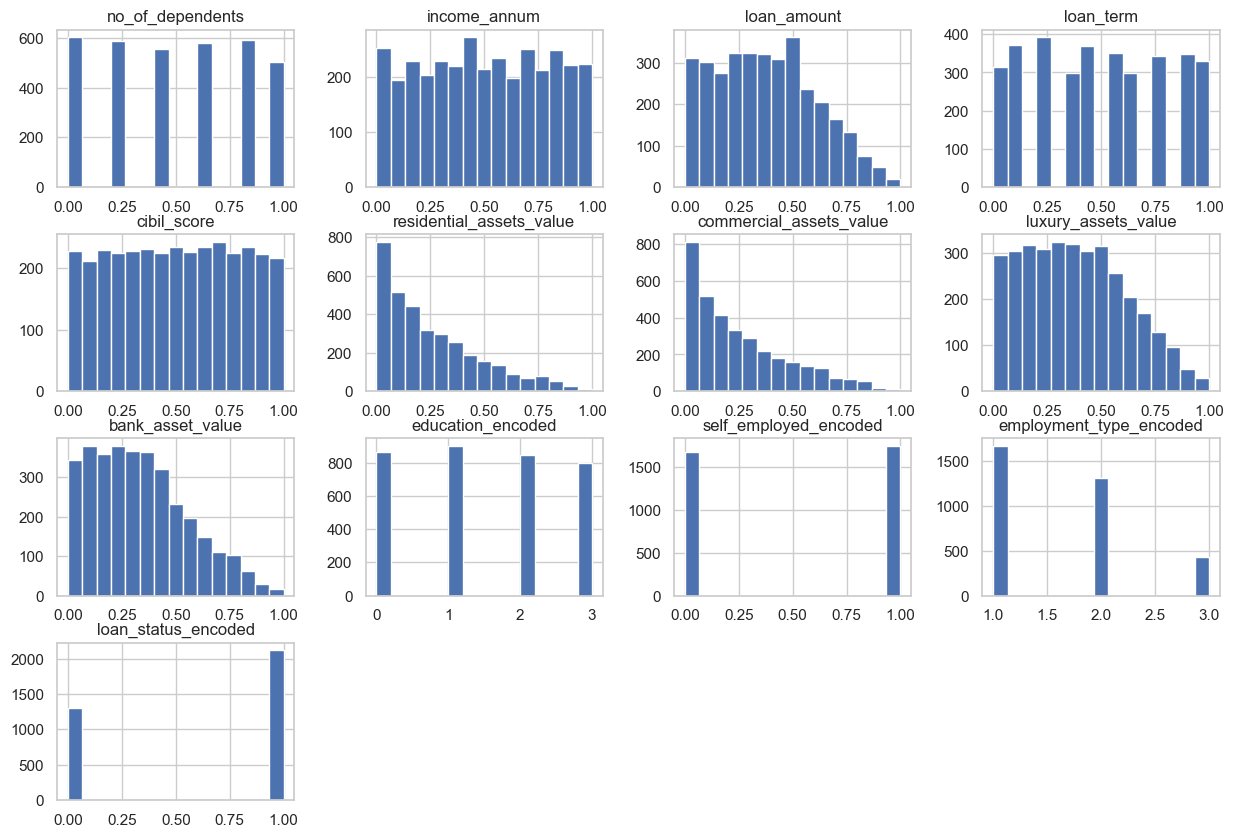

In [6]:
# Histograms for numerical features
train_scaled_df.hist(bins=15, figsize=(15, 10))
plt.show()

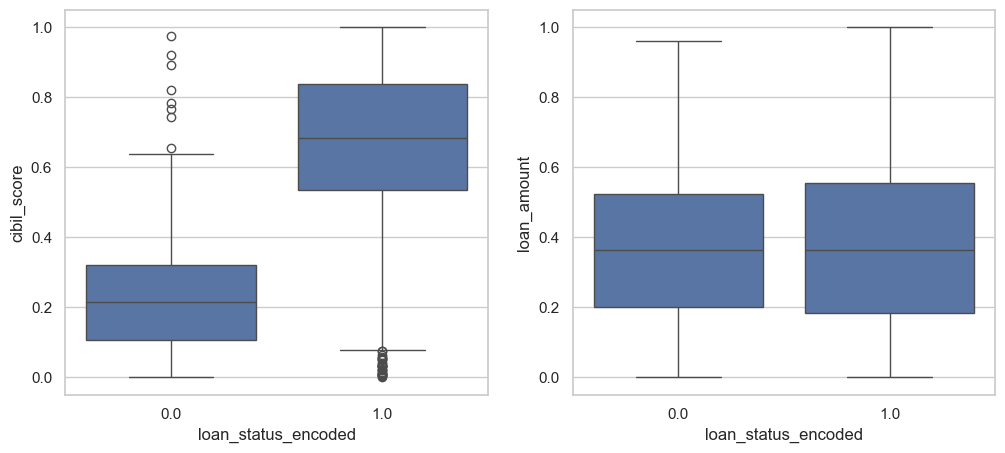

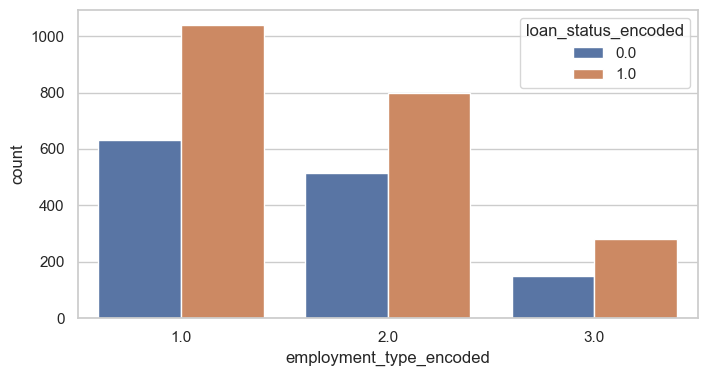

In [7]:
# Boxplots for CIBIL score and loan amount by loan status
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status_encoded', y='cibil_score', data=train_scaled_df)
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status_encoded', y='loan_amount', data=train_scaled_df)
plt.show()

# Countplot for employment status by loan status
plt.figure(figsize=(8, 4))
sns.countplot(x='employment_type_encoded', hue='loan_status_encoded', data=train_scaled_df)
plt.show()


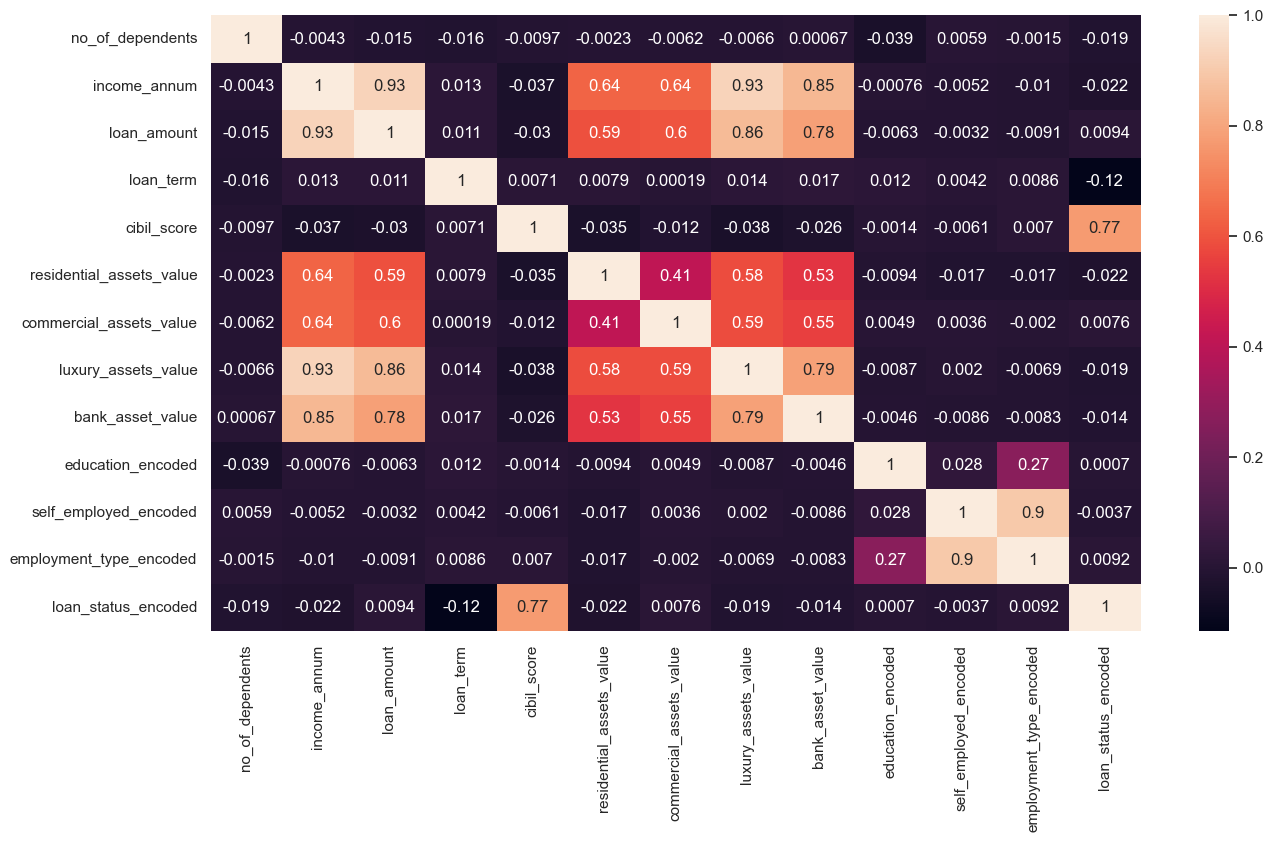

In [8]:
# Calculate the correlation matrix
corr = train_scaled_df.corr()  # Exclude original 
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)
plt.show()

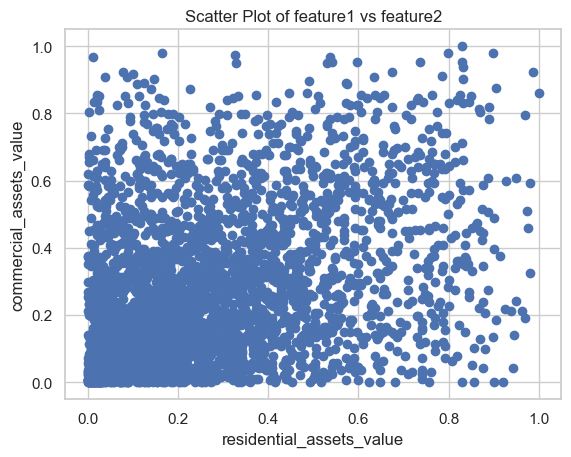

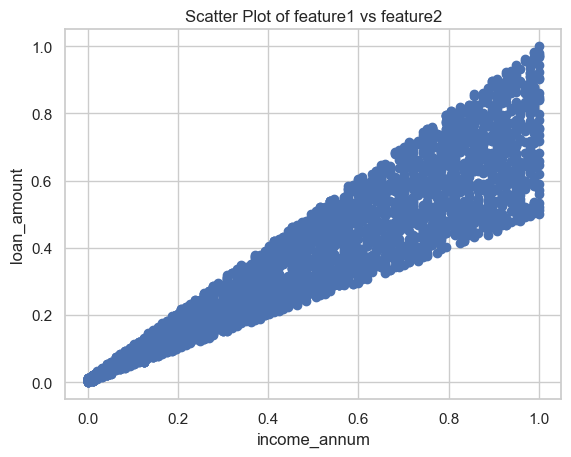

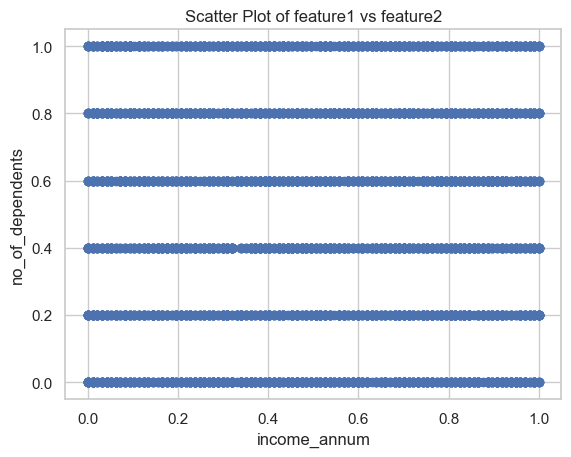

In [9]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled_df['residential_assets_value'], train_scaled_df['commercial_assets_value'])
plt.title('Scatter Plot of feature1 vs feature2')
plt.xlabel('residential_assets_value')
plt.ylabel('commercial_assets_value')
plt.show()

import matplotlib.pyplot as plt

plt.scatter(train_scaled_df['income_annum'], train_scaled_df['loan_amount'])
plt.title('Scatter Plot of feature1 vs feature2')
plt.xlabel('income_annum')
plt.ylabel('loan_amount')
plt.show()

plt.scatter(train_scaled_df['income_annum'], train_scaled_df['no_of_dependents'])
plt.title('Scatter Plot of feature1 vs feature2')
plt.xlabel('income_annum')
plt.ylabel('no_of_dependents')
plt.show()

#### Inferences

In [10]:
# 1. Employment type does have an affect on loan_status - based on count plot with loan status
# 2. FALSE(scatter plot): residential asset value AND commercial asset value having similar distribution - based on histogram distribution & correlation with loan_status
# 3. luxury asset value AND bank asset value having similar distribution - based on histogram distribution & correlation with loan_status
# 4. income is highly correlated with luxury asset value (0.93)
# 5. FALSE(domain knowledge): income and loan amount are highly correlated (0.93)
# 6. employment_type and self_employed are also highly correlated (0.94)
# 7. CIBIL Score and loan term seems to be directly affecting the loan_status

In [11]:
remove_features = ['luxury_assets_value', 'bank_asset_value', 'self_employed_encoded']
train_scaled_df = train_scaled_df.drop(remove_features, axis=1)
test_scaled_df = test_scaled_df.drop(remove_features, axis=1)
train_scaled_df

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,education_encoded,employment_type_encoded,loan_status_encoded
1675,1.0,0.793814,0.755102,0.222222,0.446667,0.202055,0.716495,2.0,1.0,1.0
1164,0.0,0.969072,0.859694,0.555556,0.683333,0.818493,0.530928,3.0,3.0,1.0
192,0.2,0.061856,0.066327,0.333333,0.636667,0.078767,0.056701,3.0,1.0,1.0
910,0.4,0.484536,0.326531,0.888889,0.756667,0.284247,0.170103,0.0,1.0,1.0
567,1.0,0.288660,0.275510,0.555556,0.235000,0.294521,0.128866,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0.113402,0.112245,0.777778,0.383333,0.113014,0.051546,1.0,1.0,0.0
466,1.0,0.030928,0.038265,0.888889,0.185000,0.037671,0.025773,1.0,1.0,0.0
3092,0.8,0.865979,0.517857,0.777778,0.248333,0.373288,0.546392,1.0,1.0,0.0
3772,0.4,0.701031,0.538265,0.555556,0.401667,0.130137,0.067010,2.0,2.0,0.0


### PCA Application

In [52]:
x_train_scaled_df = train_scaled_df.drop('loan_status_encoded', axis=1)  # Features
y_train = train_scaled_df['loan_status_encoded']  # Target variable

x_test_scaled_df = test_scaled_df.drop('loan_status_encoded', axis=1)  # Features
y_test = test_scaled_df['loan_status_encoded']  # Target variable


# Applying PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
x_train_pca = pca.fit_transform(x_train_scaled_df)

# Optionally, transform the test data using the same PCA and scaler (fit on training)
x_test_pca = pca.transform(x_test_scaled_df)

In [53]:
x_train_pca.shape, train_scaled_df.shape

((3415, 6), (3415, 10))

### Model training

In [54]:
model = RandomForestClassifier(random_state=42)
# model.fit(x_train_pca, y_train)

### Hyperparameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# Fit Grid Search to the Data
grid_search.fit(x_train_pca, y_train)

# View Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the Best Model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9496339677891654
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       318
         1.0       0.96      0.96      0.96       536

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854

[[296  22]
 [ 19 517]]


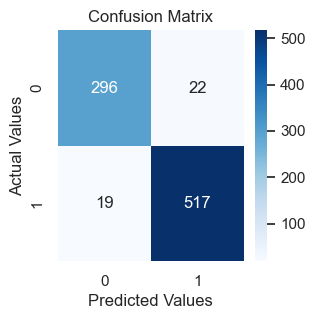

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()